# 12.5.3 Clustering
<!-- # 10.5.1 K-Means Clustering
The `sklearn` function `Kmeans()` performs K-means clustering in R. We begin with
a simple simulated example in which there truly are two clusters in the
data: the first 25 observations have a mean shift relative to the next 25
observations. -->

To run in Colab,
* click this button
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ssuai/machine_learning/blob/main/lab6-2_clustering.ipynb)
* run the following cell

In [ ]:
# clone the data folder
!git clone https://github.com/ssuai/machine_learning_data.git data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Generate random samples

Text(0, 0.5, 'X1')

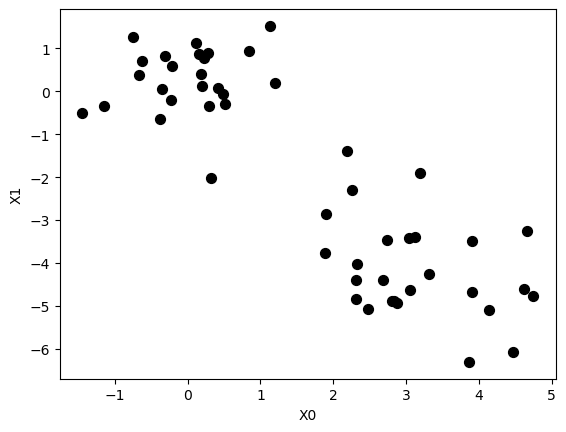

In [2]:
np.random.seed(1)

n = 50
p = 2
X = np.random.randn(n,p)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

plt.scatter(X[:,0], X[:,1], s=50, color='k') 
plt.xlabel('X0')
plt.ylabel('X1')

## K-means clustering with K = 2
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

Text(0, 0.5, 'X1')

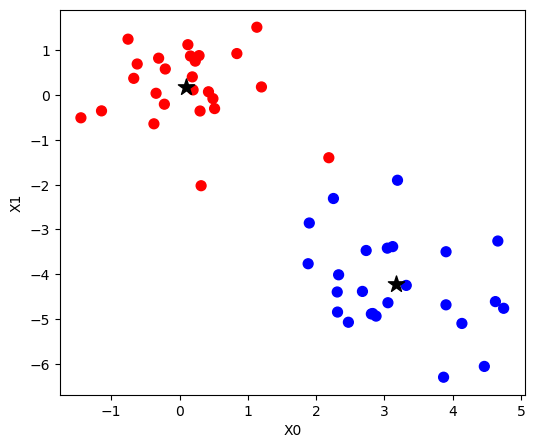

In [4]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans.labels_, cmap=plt.cm.bwr) 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 150,
            color = 'k')
plt.xlabel('X0')
plt.ylabel('X1')

## re-fit with K = 3

Text(0, 0.5, 'X1')

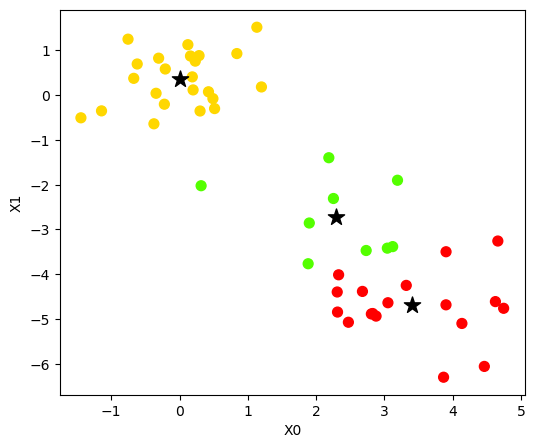

In [5]:
kmeans3 = KMeans(n_clusters = 3, random_state = 123)
kmeans3.fit(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans3.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], marker='*', s=150, color='k')
plt.xlabel('X0')
plt.ylabel('X1')

## vary number of runs

In [6]:
ns = [1, 10, 20, 30, 40, 50, 70, 100]
ws = []
for n in ns:
    km = KMeans(n_clusters=3, n_init=n, random_state=1).fit(X)
    print(km.inertia_) # sum of squared distances of samples to their closest cluster center: within-cluster variation
    ws.append(km.inertia_)

52.940179983373824
52.39005515256618
52.39005515256618
52.26990393416986
52.26990393416986
52.26990393416986
52.26990393416986
52.26990393416986


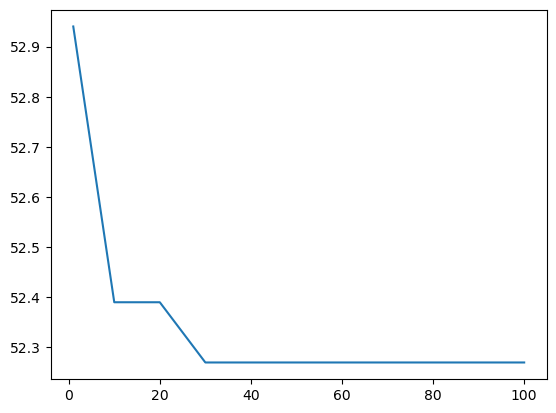

In [7]:
plt.plot(ns, ws)

## Hierarchical Clustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [8]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [9]:
clustering = AgglomerativeClustering(linkage='average').fit(X)

clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [10]:
# keep all the info to plot dendrogram
clustering = AgglomerativeClustering(linkage='average', distance_threshold=0, n_clusters=None).fit(X)

clustering.labels_

array([43, 39, 49, 26, 33, 29, 32, 28, 24, 47, 48, 35, 40, 23, 34, 37, 31,
       30, 11, 27, 38, 44, 16, 25, 14, 42, 36, 41, 45, 46, 15, 21, 22, 17,
       12, 20, 19,  7,  9, 10,  4, 13, 18,  8,  3,  6,  5,  1,  2,  0])

In [11]:
# code from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Text(0, 0.5, 'distance')

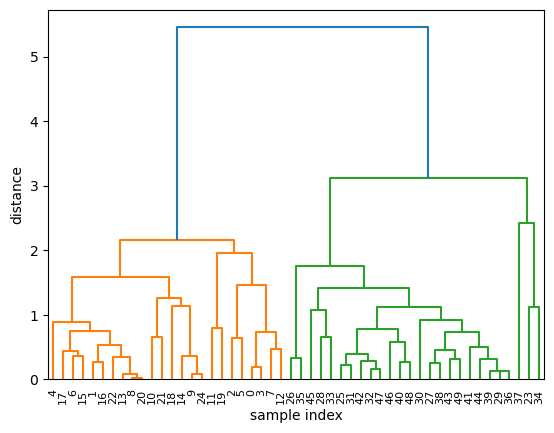

In [12]:
plot_dendrogram(clustering, truncate_mode="level", p=20)
plt.xlabel('sample index')
plt.ylabel('distance')

Text(0, 0.5, 'distance')

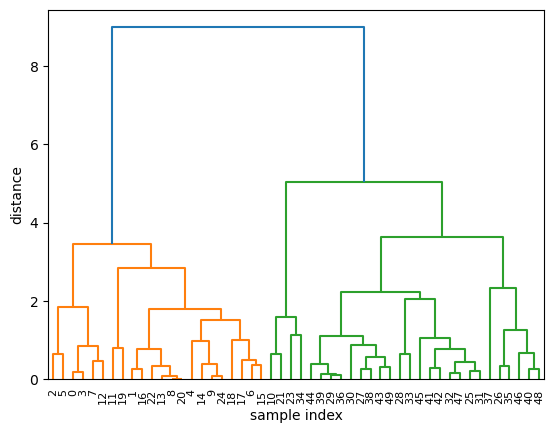

In [13]:
# keep all the info to plot dendrogram
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None).fit(X)

plot_dendrogram(clustering, truncate_mode="level", p=20)
plt.xlabel('sample index')
plt.ylabel('distance')

Text(0, 0.5, 'distance')

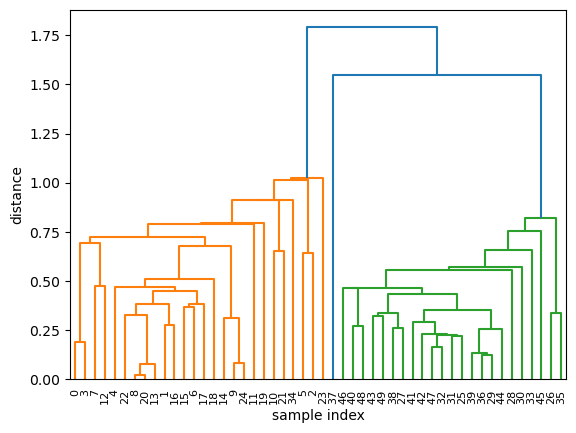

In [14]:
# keep all the info to plot dendrogram
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None).fit(X)

plot_dendrogram(clustering, truncate_mode="level", p=20)
plt.xlabel('sample index')
plt.ylabel('distance')